# AI for Market Trend Analysis (Individual Project)

## Project Title
Predicting Uptrend vs Downtrend using AI business signals

## Objective
Build a machine learning classification model to predict whether the market trend will go **Up** or **Down** based on:
- AI revenue
- AI revenue growth
- R&D spending
- Company events
- Time-based signals

## Dataset
Synthetic realistic daily financial market dataset:
`ai_financial_market_daily_realistic_synthetic.csv`

## Target
**Target_Trend**
- 1 → Uptrend (Stock_Impact_% > 0)
- 0 → Downtrend (Stock_Impact_% ≤ 0)

# 1. Problem Definition & Objective
Market movements are influenced by multiple factors such as company performance, AI revenue growth, and major business events.
Manually tracking these signals daily is difficult.

## 1.1 Problem Statement
Given historical daily company data, predict whether the market trend will be **Uptrend** or **Downtrend** for the next observation.

## 1.2 Real-world relevance
A trend prediction system can help businesses and analysts:
- Monitor market direction
- Understand event-driven changes
- Support decision making (not financial advice)

# 2. Data understandinig and preparation

## 2.1 Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset/ai_financial_market_daily_realistic_synthetic.csv")
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [2]:
print("Shape:", df.shape)
df.info()

Shape: (10959, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


## 2.2 Missing values + Duplicates

In [3]:
df.isna().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

## 2.3 Quick Column Explanation

Columns (Data Dictionary)

- **Date**: Daily date
- **Company**: Company name
- **R&D_Spending_USD_Mn**: R&D spending (million USD)
- **AI_Revenue_USD_Mn**: AI Revenue (million USD)
- **AI_Revenue_Growth_%**: AI Revenue growth percentage
- **Event**: Business event/news label (can be missing)
- **Stock_Impact_%**: Simulated daily stock impact percentage


# 3. Data Cleaning and Preprocessing

## 3.1 Cleaning steps performed
- Removed duplicates (if any)
- Converted Date to datetime
- Filled missing Event values with "No_Event"
- Sorted the dataset by Company and Date for correct time order


## 3.2 Cleaning

In [5]:
dfc= df.copy()

dfc = dfc.drop_duplicates()

dfc["Date"] = pd.to_datetime(dfc["Date"], errors="coerce")
dfc = dfc.dropna(subset=["Date"])

dfc["Event"] = dfc["Event"].fillna("No_Event")

dfc = dfc.sort_values(["Company", "Date"]).reset_index(drop=True)

dfc.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,Google,79.89,30.19,0.64,No_Event,-0.02
1,2015-01-02,Google,78.99,30.44,1.47,No_Event,-0.98
2,2015-01-03,Google,79.20,30.46,1.53,No_Event,0.78
3,2015-01-04,Google,79.59,30.55,1.82,No_Event,-0.41
4,2015-01-05,Google,81.50,30.59,1.97,No_Event,-0.78


In [6]:
dfc.isna().sum()

Date                   0
Company                0
R&D_Spending_USD_Mn    0
AI_Revenue_USD_Mn      0
AI_Revenue_Growth_%    0
Event                  0
Stock_Impact_%         0
dtype: int64

In [7]:
dfc['Year'] = dfc['Date'].dt.year

In [8]:
print(dfc['Year'].unique())
print(dfc['Year'].nunique())

[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
10


In [9]:
dfc['Event'].value_counts()

Event
No_Event                           10726
AI speech recognition release         37
AI-powered search update              32
AI partnership deal                   32
AI Ads Optimization upgrade           32
AI Video Recommendation upgrade       29
Cloud AI launch                       27
AI ethics policy update               27
TensorFlow open-source release         1
AlphaGo beats Lee Sedol                1
BERT for Search launch                 1
MUM Search Model launch                1
Bard chatbot launch                    1
Gemini AI release                      1
LLaMA 1 release                        1
LLaMA 2 release                        1
LLaMA 3 release (predicted)            1
GPT-1 release                          1
GPT-2 release                          1
GPT-3 release                          1
Codex release                          1
DALL·E 2 release                       1
ChatGPT (GPT-3.5) launch               1
GPT-4 release                          1
GPT-5 rele

# 4. EDA

## 4.1 Bar Plots to show expenditure and revenue of the companies

In [10]:
print("Company's spending for R & D in $Bn :-")
RD = dfc.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
print(RD)

print("\nCompany's AI_Revenue_USD_Bn :-")
rev = dfc.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000
print(rev)

Company's spending for R & D in $Bn :-
Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

Company's AI_Revenue_USD_Bn :-
Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64


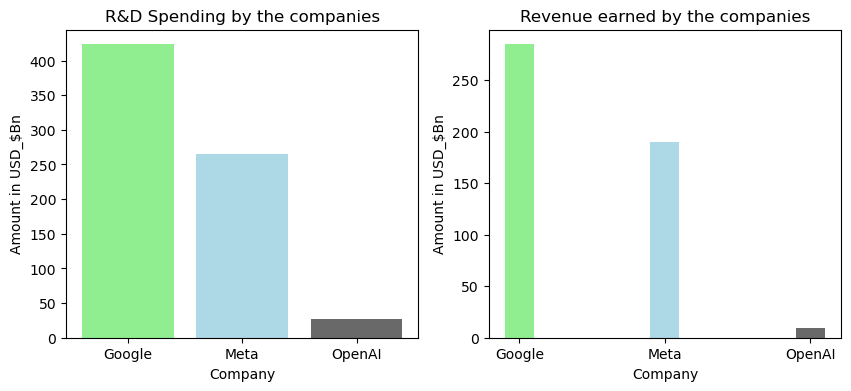

In [11]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)

plt.bar(RD.index, RD.values, color = ['lightgreen', 'lightblue', 'dimgray'])
plt.title( "R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.subplot(1,2,2)

plt.bar(rev.index, rev.values, color = ['lightgreen', 'lightblue', 'dimgray'], width = 0.2)

plt.title( "Revenue earned by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.show()

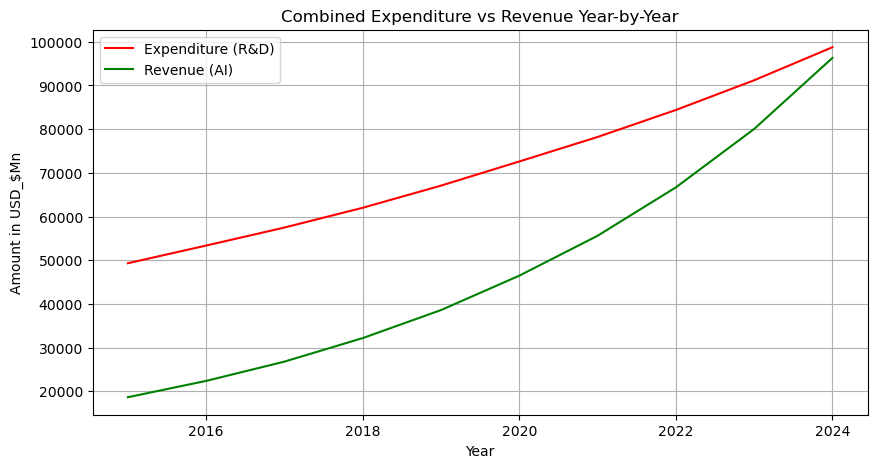

Expenditure:
 Year
2015    49304.23
2016    53349.94
2017    57475.12
2018    62002.16
2019    67071.51
2020    72602.53
2021    78207.32
2022    84390.17
2023    91193.92
2024    98760.08
Name: R&D_Spending_USD_Mn, dtype: float64

Revenue:
 Year
2015    18623.21
2016    22361.20
2017    26776.80
2018    32164.44
2019    38580.32
2020    46456.19
2021    55591.14
2022    66674.24
2023    80041.64
2024    96313.91
Name: AI_Revenue_USD_Mn, dtype: float64


In [12]:
spend = dfc.groupby('Year')['R&D_Spending_USD_Mn'].sum()
revenue = dfc.groupby('Year')['AI_Revenue_USD_Mn'].sum()

plt.figure(figsize=(10,5))

plt.plot(spend.index, spend.values, label='Expenditure (R&D)', color='r')
plt.plot(revenue.index, revenue.values, label='Revenue (AI)', color='g')

plt.title("Combined Expenditure vs Revenue Year-by-Year")
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")
plt.legend()
plt.grid(True)

plt.show()

print('Expenditure:\n',spend)
print('\nRevenue:\n',revenue)

## 4.2 Stock Impact (%) Trend Over Time & Company Compariso

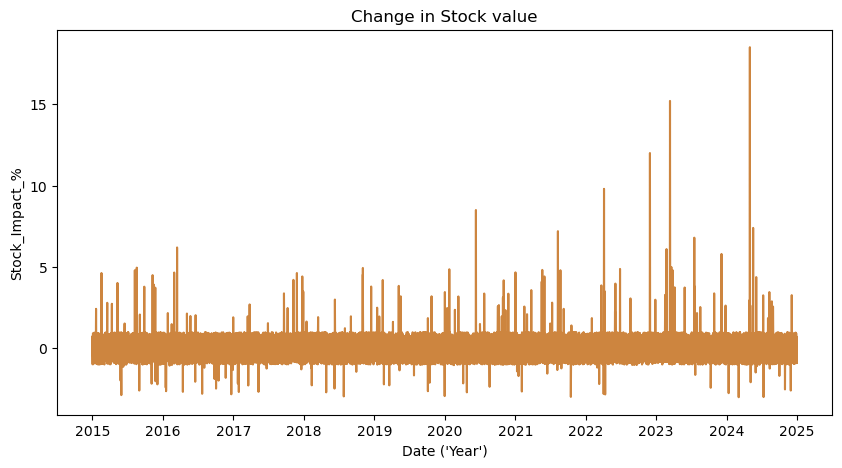

In [13]:
plt.figure(figsize = (10,5))

plt.plot(dfc['Date'], dfc['Stock_Impact_%'], color = 'peru')

plt.title("Change in Stock value")
plt.xlabel("Date ('Year')")
plt.ylabel("Stock_Impact_%")

plt.show()

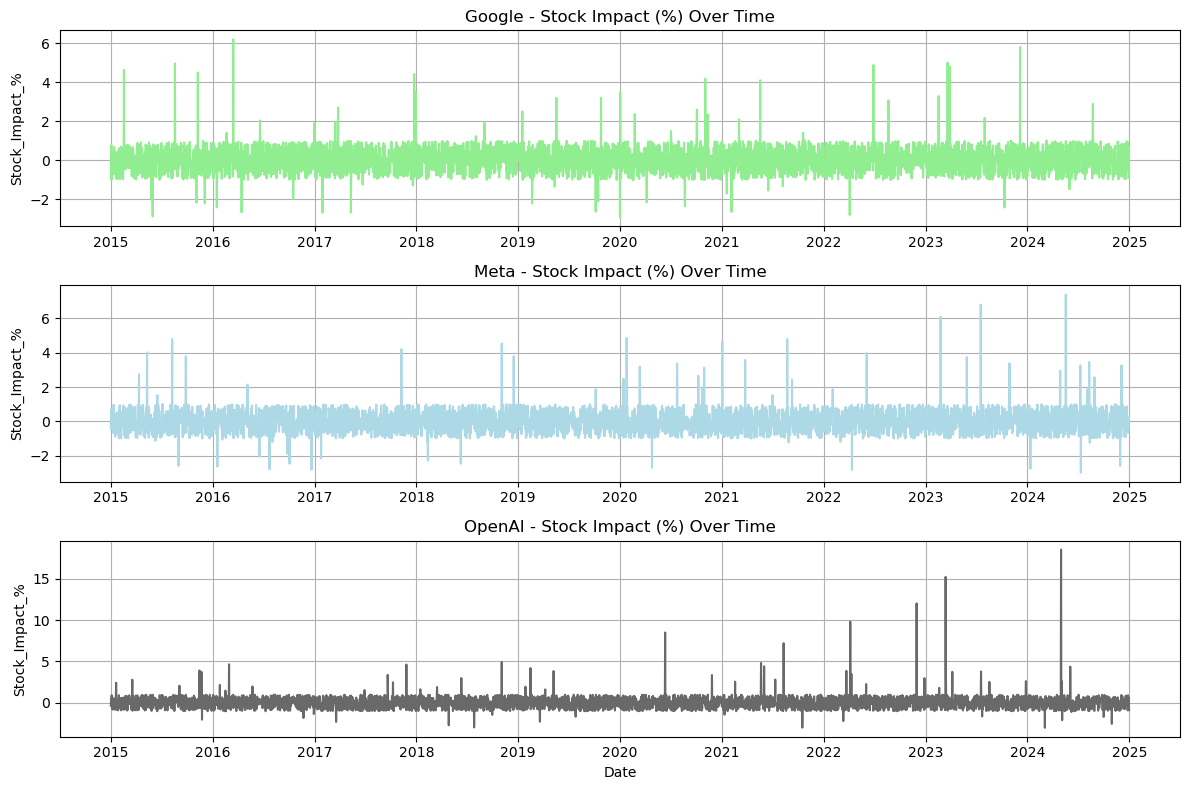

In [14]:
data_google = dfc[dfc['Company'] == 'Google']
data_meta   = dfc[dfc['Company'] == 'Meta']
data_openai = dfc[dfc['Company'] == 'OpenAI']

plt.figure(figsize=(12,8))

# 1) Google
plt.subplot(3, 1, 1)
plt.plot(data_google['Date'], data_google['Stock_Impact_%'], color='lightgreen')
plt.title("Google - Stock Impact (%) Over Time")
plt.ylabel("Stock_Impact_%")
plt.grid(True)

# 2) Meta
plt.subplot(3, 1, 2)
plt.plot(data_meta['Date'], data_meta['Stock_Impact_%'], color='lightblue')
plt.title("Meta - Stock Impact (%) Over Time")
plt.ylabel("Stock_Impact_%")
plt.grid(True)

# 3) OpenAI
plt.subplot(3, 1, 3)
plt.plot(data_openai['Date'], data_openai['Stock_Impact_%'], color='dimgray')
plt.title("OpenAI - Stock Impact (%) Over Time")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.grid(True)

plt.tight_layout()
plt.show()


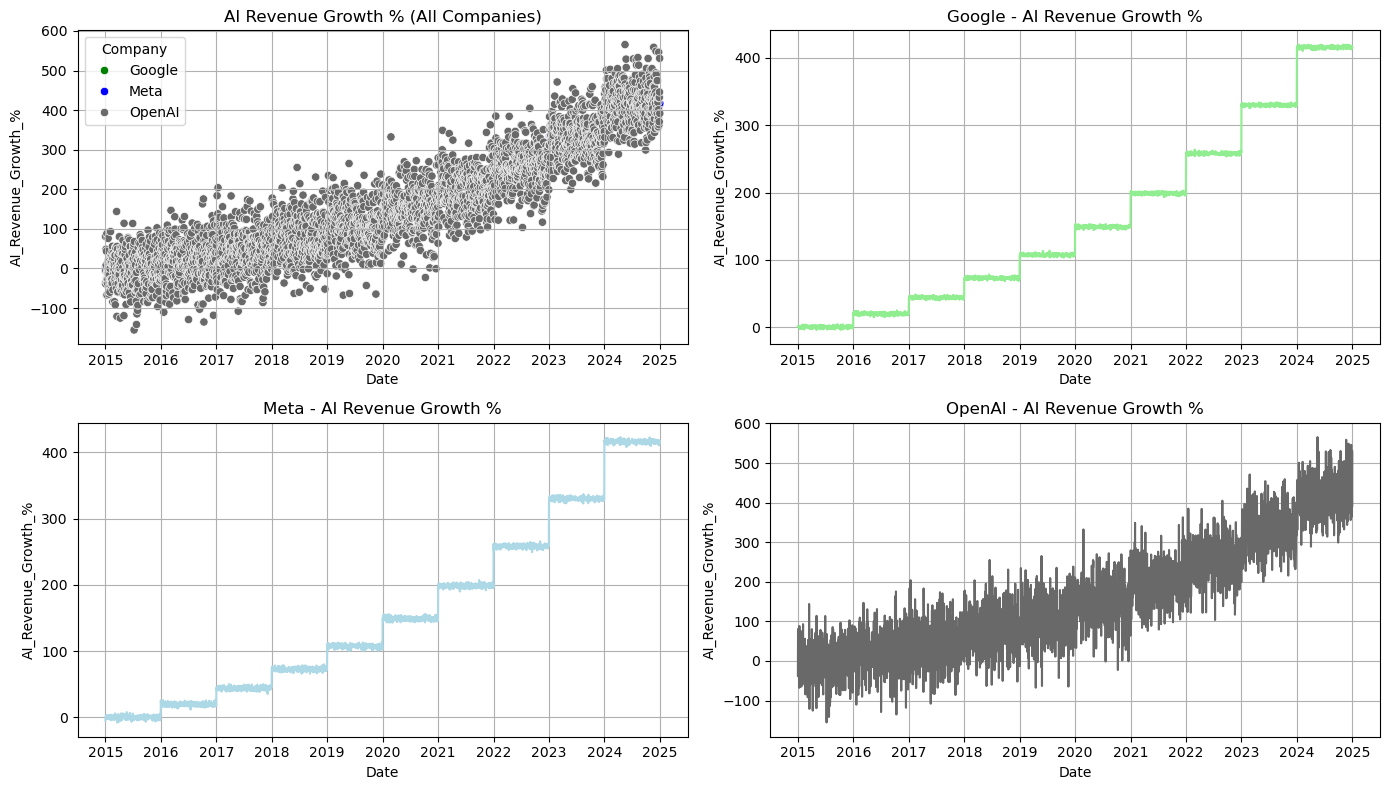

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

# 1) Scatter (all companies)
palette = {
    "Google": "green", "Meta": "blue", "OpenAI": "dimgray"}

sns.scatterplot(
    x="Date",
    y="AI_Revenue_Growth_%",
    data=dfc,
    hue="Company",
    palette=palette,
    ax=axes[0,0])
axes[0,0].set_title("AI Revenue Growth % (All Companies)")
axes[0,0].grid(True)

# 2) Google
axes[0,1].plot(data_google['Date'], data_google['AI_Revenue_Growth_%'], color='lightgreen')
axes[0,1].set_title("Google - AI Revenue Growth %")
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("AI_Revenue_Growth_%")
axes[0,1].grid(True)

# 3) Meta
axes[1,0].plot(data_meta['Date'], data_meta['AI_Revenue_Growth_%'], color='lightblue')
axes[1,0].set_title("Meta - AI Revenue Growth %")
axes[1,0].set_xlabel("Date")
axes[1,0].set_ylabel("AI_Revenue_Growth_%")
axes[1,0].grid(True)

# 4) OpenAI
axes[1,1].plot(data_openai['Date'], data_openai['AI_Revenue_Growth_%'], color='dimgray')
axes[1,1].set_title("OpenAI - AI Revenue Growth %")
axes[1,1].set_xlabel("Date")
axes[1,1].set_ylabel("AI_Revenue_Growth_%")
axes[1,1].grid(True)


plt.tight_layout()
plt.show()

## 4.3 Correlation between the columns

<Axes: >

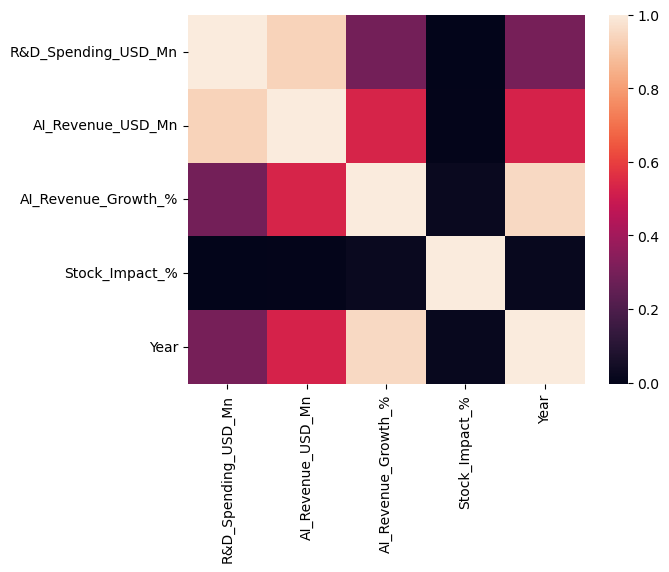

In [16]:
sns.heatmap( dfc.corr(numeric_only = True) )

### 4.4 Outliers

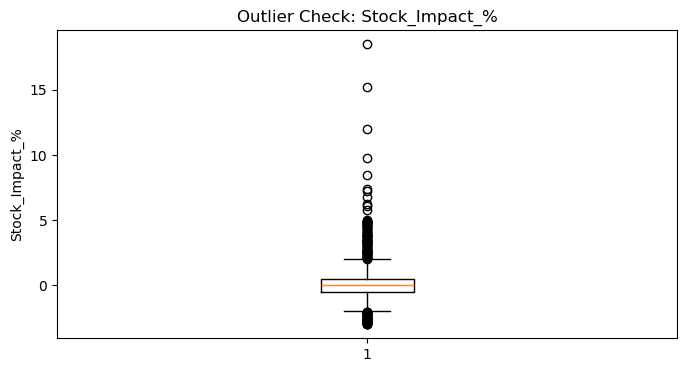

In [17]:
plt.figure(figsize=(8,4))
plt.boxplot(dfc["Stock_Impact_%"])
plt.title("Outlier Check: Stock_Impact_%")
plt.ylabel("Stock_Impact_%")
plt.show()

# 5. Feature Engineering

## 5.1 Target Definition (Trend Classification)
We define trend direction using Stock_Impact_%:
- Uptrend (1) if Stock_Impact_% > 0
- Downtrend (0) otherwise

## 5.2 Create Target, Time Features, Lag Features

In [18]:
df_fe = dfc.copy()

df_fe["Target_Trend"] = (df_fe["Stock_Impact_%"] > 0).astype(int)

df_fe["Target_Trend"].value_counts()

Target_Trend
0    5504
1    5455
Name: count, dtype: int64

In [19]:
df_fe["Year"] = df_fe["Date"].dt.year
df_fe["Month"] = df_fe["Date"].dt.month
df_fe["Day"] = df_fe["Date"].dt.day
df_fe["DayOfWeek"] = df_fe["Date"].dt.dayofweek

In [20]:
df_fe["StockImpact_Lag1"] = df_fe.groupby("Company")["Stock_Impact_%"].shift(1)
df_fe["Growth_Lag1"] = df_fe.groupby("Company")["AI_Revenue_Growth_%"].shift(1)
df_fe["Revenue_Lag1"] = df_fe.groupby("Company")["AI_Revenue_USD_Mn"].shift(1)
df_fe["RND_Lag1"] = df_fe.groupby("Company")["R&D_Spending_USD_Mn"].shift(1)

df_fe = df_fe.dropna().reset_index(drop=True)

df_fe.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Target_Trend,Month,Day,DayOfWeek,StockImpact_Lag1,Growth_Lag1,Revenue_Lag1,RND_Lag1
0,2015-01-02,Google,78.99,30.44,1.47,No_Event,-0.98,2015,0,1,2,4,-0.02,0.64,30.19,79.89
1,2015-01-03,Google,79.20,30.46,1.53,No_Event,0.78,2015,1,1,3,5,-0.98,1.47,30.44,78.99
2,2015-01-04,Google,79.59,30.55,1.82,No_Event,-0.41,2015,0,1,4,6,0.78,1.53,30.46,79.20
3,2015-01-05,Google,81.50,30.59,1.97,No_Event,-0.78,2015,0,1,5,0,-0.41,1.82,30.55,79.59
4,2015-01-06,Google,79.65,30.11,0.36,AI-powered search update,-0.97,2015,0,1,6,1,-0.78,1.97,30.59,81.50


In [21]:
# Rolling mean/std for revenue and growth (within each company)
df_fe["Revenue_RollMean_3"] = df_fe.groupby("Company")["AI_Revenue_USD_Mn"].transform(lambda x: x.rolling(3).mean())
df_fe["Growth_RollMean_3"] = df_fe.groupby("Company")["AI_Revenue_Growth_%"].transform(lambda x: x.rolling(3).mean())

df_fe["StockImpact_RollMean_3"] = df_fe.groupby("Company")["Stock_Impact_%"].transform(lambda x: x.rolling(3).mean())
df_fe["StockImpact_RollStd_3"] = df_fe.groupby("Company")["Stock_Impact_%"].transform(lambda x: x.rolling(3).std())

In [22]:
df_fe.isna().sum()

Date                      0
Company                   0
R&D_Spending_USD_Mn       0
AI_Revenue_USD_Mn         0
AI_Revenue_Growth_%       0
Event                     0
Stock_Impact_%            0
Year                      0
Target_Trend              0
Month                     0
Day                       0
DayOfWeek                 0
StockImpact_Lag1          0
Growth_Lag1               0
Revenue_Lag1              0
RND_Lag1                  0
Revenue_RollMean_3        6
Growth_RollMean_3         6
StockImpact_RollMean_3    6
StockImpact_RollStd_3     6
dtype: int64

In [23]:
df_fe = df_fe.dropna().reset_index(drop=True)
df_fe.shape

(10950, 20)

In [24]:
df_fe.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Target_Trend,Month,Day,DayOfWeek,StockImpact_Lag1,Growth_Lag1,Revenue_Lag1,RND_Lag1,Revenue_RollMean_3,Growth_RollMean_3,StockImpact_RollMean_3,StockImpact_RollStd_3
0,2015-01-04,Google,79.59,30.55,1.82,No_Event,-0.41,2015,0,1,4,6,0.78,1.53,30.46,79.20,30.483333,1.606667,-0.203333,0.898016
1,2015-01-05,Google,81.50,30.59,1.97,No_Event,-0.78,2015,0,1,5,0,-0.41,1.82,30.55,79.59,30.533333,1.773333,-0.136667,0.815128
2,2015-01-06,Google,79.65,30.11,0.36,AI-powered search update,-0.97,2015,0,1,6,1,-0.78,1.97,30.59,81.50,30.416667,1.383333,-0.720000,0.284781
3,2015-01-07,Google,79.43,30.08,0.28,No_Event,0.32,2015,1,1,7,2,-0.97,0.36,30.11,79.65,30.260000,0.870000,-0.476667,0.696443
4,2015-01-08,Google,79.20,29.89,-0.38,No_Event,-0.52,2015,0,1,8,3,0.32,0.28,30.08,79.43,30.026667,0.086667,-0.390000,0.654752


In [25]:
df_fe.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,10950,2020-01-02 12:00:00.000000256,2015-01-04 00:00:00,2017-07-04 00:00:00,2020-01-02 12:00:00,2022-07-03 00:00:00,2024-12-31 00:00:00,NaN
R&D_Spending_USD_Mn,10950.0,65.201259,1.57,8.64,71.0,99.615,163.83,47.926419
AI_Revenue_USD_Mn,10950.0,44.148883,-0.55,3.61,35.24,71.69,155.96,41.647738
AI_Revenue_Growth_%,10950.0,159.526822,-155.43,43.895,134.755,258.335,565.5,135.437749
Stock_Impact_%,10950.0,0.025489,-3.0,-0.5,-0.0,0.51,18.5,0.749639
Year,10950.0,2019.50411,2015.0,2017.0,2020.0,2022.0,2024.0,2.871074
Target_Trend,10950.0,0.497717,0.0,0.0,0.0,1.0,1.0,0.500018
Month,10950.0,6.526849,1.0,4.0,7.0,10.0,12.0,3.44681
Day,10950.0,15.74274,1.0,8.0,16.0,23.0,31.0,8.796033
DayOfWeek,10950.0,2.999452,0.0,1.0,3.0,5.0,6.0,2.000776


# 6. Model / System Design

## AI Technique Used
Supervised Machine Learning (Classification)
## Pipeline
Data → Cleaning → Feature Engineering → Encoding → Train/Test Split → Model Training → Evaluation

## Models Used
1. Logistic Regression (baseline)
2. Random Forest Classifier (main model)

Baseline models are required to benchmark performance.
Random Forest is used because it can learn non-linear patterns and handle mixed features well.

# 7. Data Encoding & Train-Test Split

In [26]:
df_model = df_fe.copy()

df_model = pd.get_dummies(df_model, columns=["Company", "Event"], drop_first=True)

df_model.shape

(10950, 44)

In [27]:
#time based split

df_model = df_model.sort_values("Date").reset_index(drop=True)

X = df_model.drop(columns=["Date", "Stock_Impact_%", "Target_Trend"])
y = df_model["Target_Trend"]

split = int(len(df_model) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

print("Train X:", X_train.shape, "Test X:", X_test.shape)
print("Train y:", y_train.shape, "Test y:", y_test.shape)

Train X: (8760, 41) Test X: (2190, 41)
Train y: (8760,) Test y: (2190,)


In [28]:
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
Target_Trend
0    0.503311
1    0.496689
Name: proportion, dtype: float64

Test class distribution:
Target_Trend
1    0.501826
0    0.498174
Name: proportion, dtype: float64


# 8. Training

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def evaluate_model(model_name, y_true, y_pred, y_prob=None):
    acc = accuracy_score(y_true, y_pred)
    error_rate = 1 - acc
    
    print("="*60)
    print(f"MODEL: {model_name}")
    print("="*60)
    print("Accuracy:", round(acc, 4))
    print("Error Rate (1-Accuracy):", round(error_rate, 4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    if y_prob is not None:
        auc = roc_auc_score(y_true, y_prob)
        print("ROC-AUC:", round(auc, 4))
        

## 8.1 Baseline Model (logistic Regression)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_model = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("lr", LogisticRegression(max_iter=10000, solver="saga", random_state=42))
])

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression (Baseline)", y_test, y_pred_log, y_prob_log)

MODEL: Logistic Regression (Baseline)
Accuracy: 0.7434
Error Rate (1-Accuracy): 0.2566

Confusion Matrix:
 [[825 266]
 [296 803]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1091
           1       0.75      0.73      0.74      1099

    accuracy                           0.74      2190
   macro avg       0.74      0.74      0.74      2190
weighted avg       0.74      0.74      0.74      2190

ROC-AUC: 0.8394


## 8.2 Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=400,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

MODEL: Random Forest
Accuracy: 0.7187
Error Rate (1-Accuracy): 0.2813

Confusion Matrix:
 [[898 193]
 [423 676]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74      1091
           1       0.78      0.62      0.69      1099

    accuracy                           0.72      2190
   macro avg       0.73      0.72      0.72      2190
weighted avg       0.73      0.72      0.72      2190

ROC-AUC: 0.8175


## 8.3 Gradient Boosting Classifier 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

evaluate_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb)

MODEL: Gradient Boosting
Accuracy: 0.726
Error Rate (1-Accuracy): 0.274

Confusion Matrix:
 [[718 373]
 [227 872]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      1091
           1       0.70      0.79      0.74      1099

    accuracy                           0.73      2190
   macro avg       0.73      0.73      0.72      2190
weighted avg       0.73      0.73      0.72      2190

ROC-AUC: 0.8286


## 8.4 Models Summary

In [33]:
models_summary = pd.DataFrame([
    {"Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Error Rate": 1 - accuracy_score(y_test, y_pred_log),
    "ROC-AUC": roc_auc_score(y_test, y_prob_log)},
    
    {"Model": "Random Forest",
     "Accuracy": accuracy_score(y_test, y_pred_rf),
     "Error Rate": 1 - accuracy_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf)},
    
    {"Model": "Gradient Boosting",
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Error Rate": 1 - accuracy_score(y_test, y_pred_gb),
    "ROC-AUC": roc_auc_score(y_test, y_prob_gb) }])

models_summary

,Model,Accuracy,Error Rate,ROC-AUC
0,Logistic Regression,0.743379,0.256621,0.839395
1,Random Forest,0.718721,0.281279,0.817490
2,Gradient Boosting,0.726027,0.273973,0.828636


# 9. Evaluation & Metrics

## 9.1 Sample Output Predictions

In [34]:
sample_preds = pd.DataFrame({
    "Actual": y_test.values[:25],
    "Logistic_Pred": y_pred_log[:25],
    "RF_Pred": y_pred_rf[:25],
    "GB_Pred": y_pred_gb[:25]})

sample_preds

,Actual,Logistic_Pred,RF_Pred,GB_Pred
0,1,1,1,1
1,1,0,0,0
2,0,0,1,0
3,1,1,0,1
4,0,1,1,1
5,1,1,1,1
6,0,1,1,1
7,0,0,0,0
8,1,1,1,1
9,0,1,0,1


## 9.2 Feature Importance

In [35]:
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(15)

top_features

StockImpact_RollMean_3    0.263556
StockImpact_Lag1          0.114866
StockImpact_RollStd_3     0.098205
R&D_Spending_USD_Mn       0.051749
AI_Revenue_Growth_%       0.051273
RND_Lag1                  0.050839
Growth_Lag1               0.050077
Growth_RollMean_3         0.049180
AI_Revenue_USD_Mn         0.048678
Revenue_Lag1              0.047653
Revenue_RollMean_3        0.047631
Day                       0.044554
Month                     0.032498
DayOfWeek                 0.028318
Year                      0.012649
dtype: float64

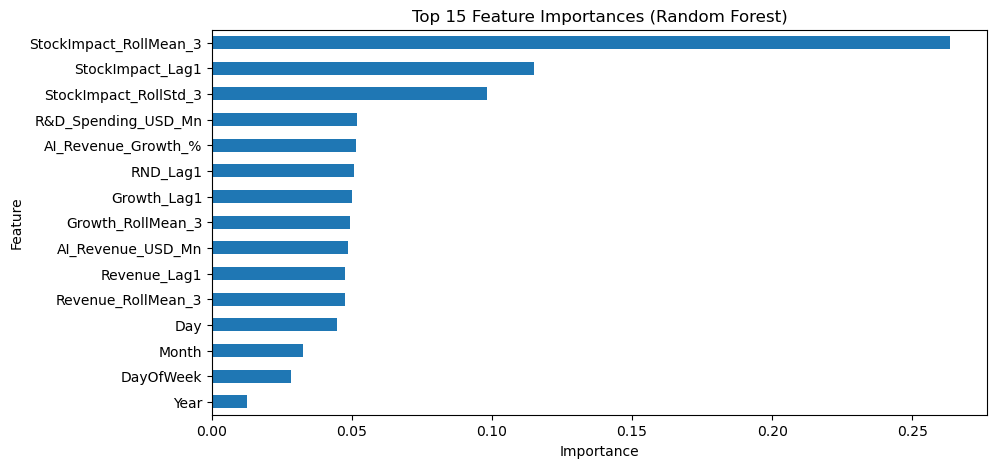

In [36]:
plt.figure(figsize=(10,5))
top_features.sort_values().plot(kind="barh")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 10. Ethical Considerations & Responsible AI

## 10.1 Bias & Fairness Considerations
- This project uses a synthetic dataset, so the patterns may reflect assumptions made during data generation rather than real market behavior.
- Event categories may not be equally distributed across companies, which can indirectly bias the model toward patterns seen more frequently.
- The model may perform differently for different companies depending on how much historical data is available for each company.

## 10.2 Dataset Limitations
- The dataset is synthetic and does not include real-world factors such as:
  - macroeconomic conditions (inflation, interest rates)
  - global news and geopolitical events
  - investor sentiment and trading psychology
- Stock market trends are highly noisy and non-deterministic, so perfect prediction is not realistic.

## 10.3 Responsible Use of AI
- This project is created for educational purposes and should not be treated as financial or investment advice.
- Predictions should only be used as decision support signals, not as an automated trading instruction.
- In real deployment, the model would require:
  - continuous monitoring
  - periodic retraining on updated data
  - performance validation under different market conditions
- Any real-world usage must be transparent about risks, uncertainty, and limitations.


# 11. Conclusion & Future Scope

## 11.1 Conclusion
This project successfully demonstrates an end-to-end AI workflow for market trend analysis:
- Understanding and cleaning a market dataset
- Performing exploratory data analysis (EDA)
- Engineering meaningful features such as time-based and lag-based signals
- Training multiple classification models (baseline + advanced models)
- Evaluating model performance using Accuracy, Error Rate, and ROC-AUC

Among the tested models, Logistic Regression achieved the best overall performance, indicating that the engineered business signals and lag-based features provide useful information for predicting daily trend direction.

## 11.2 Future Scope / Improvements
Possible improvements and extensions include:
- Adding more lag-based features such as Lag2, Lag3, and rolling windows of different sizes (5, 7, 14 days).
- Applying hyperparameter tuning (GridSearchCV / RandomizedSearchCV) to improve Random Forest and Gradient Boosting performance.
- Trying advanced models like XGBoost/LightGBM (if allowed) for improved predictive accuracy.
- Building a time-series deep learning model such as LSTM for sequential trend learning.
- Including additional real-world signals such as:
  - macroeconomic indicators
  - news sentiment and social media sentiment (NLP)
  - volatility index (VIX) or sector performance indicators